In [1]:
library("rcompanion")
library("car")
library("fastR2")
library("dplyr")

Loading required package: carData



ERROR: Error in library("fastR2"): there is no package called 'fastR2'


In [2]:
install.packages("fastR2")

Installing package into 'C:/Users/Marcy/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

also installing the dependencies 'forcats', 'bit', 'tweenr', 'polyclip', 'haven', 'bit64', 'lazyeval', 'terra', 'ggforce', 'labelled', 'vroom', 'tzdb', 'png', 'jpeg', 'crosstalk', 'htmlwidgets', 'markdown', 'raster', 'viridis', 'leaflet.providers', 'ggformula', 'mosaicData', 'mosaicCore', 'ggstance', 'ggridges', 'ggrepel', 'readr', 'latticeExtra', 'ggdendro', 'gridExtra', 'leaflet', 'mosaic', 'maxLik', 'miscTools'




package 'forcats' successfully unpacked and MD5 sums checked
package 'bit' successfully unpacked and MD5 sums checked
package 'tweenr' successfully unpacked and MD5 sums checked
package 'polyclip' successfully unpacked and MD5 sums checked
package 'haven' successfully unpacked and MD5 sums checked
package 'bit64' successfully unpacked and MD5 sums checked
package 'lazyeval' successfully unpacked and MD5 sums checked
package 'terra' successfully unpacked and MD5 sums checked
package 'ggforce' successfully unpacked and MD5 sums checked
package 'labelled' successfully unpacked and MD5 sums checked
package 'vroom' successfully unpacked and MD5 sums checked
package 'tzdb' successfully unpacked and MD5 sums checked
package 'png' successfully unpacked and MD5 sums checked
package 'jpeg' successfully unpacked and MD5 sums checked
package 'crosstalk' successfully unpacked and MD5 sums checked
package 'htmlwidgets' successfully unpacked and MD5 sums checked
package 'markdown' successfully unpack

In [3]:
honey <- read.csv("C:/Users/Marcy/Documents/Entity Coursework/DSO 105 Basic Stats in Python/Lesson 5/honey.csv")

In [4]:
head(honey)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>
1,AL,9000,66,594000,214000,1.90,1129000,2008
2,AZ,25000,64,1600000,336000,1.26,2016000,2008
3,AR,28000,75,2100000,525000,1.35,2835000,2008
4,CA,360000,51,18360000,4039000,1.39,25520000,2008
5,CO,27000,45,1215000,656000,1.51,1835000,2008
6,FL,150000,79,11850000,1304000,1.32,15642000,2008


## determine whether honey production totalprod has changed over the years (year) using a repeated measures ANOVA. Provide a one-sentence conclusion at the bottom of your program file about the analysis you performed.

#### data wrangling

In [8]:
honey$year <- as.character(honey$year)

In [9]:
honey$year <- as.factor(honey$year)

#### test for normal distribution

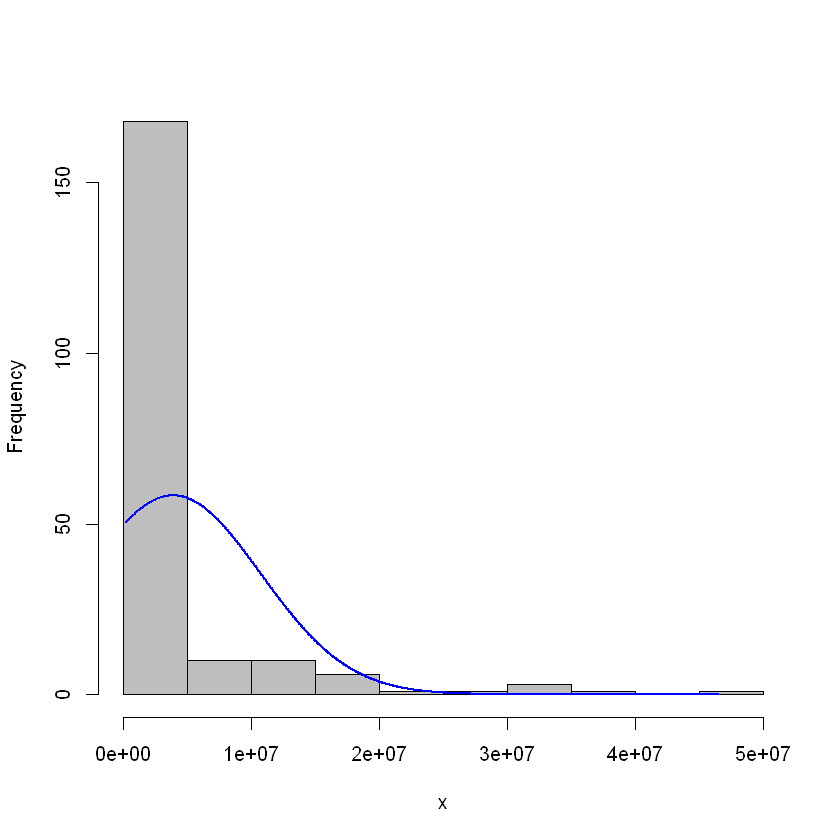

In [10]:
plotNormalHistogram(honey$totalprod)

#### positively skewed, sqrt not enough, so try log

In [13]:
honey$totalprodLOG <- log(honey$totalprod)

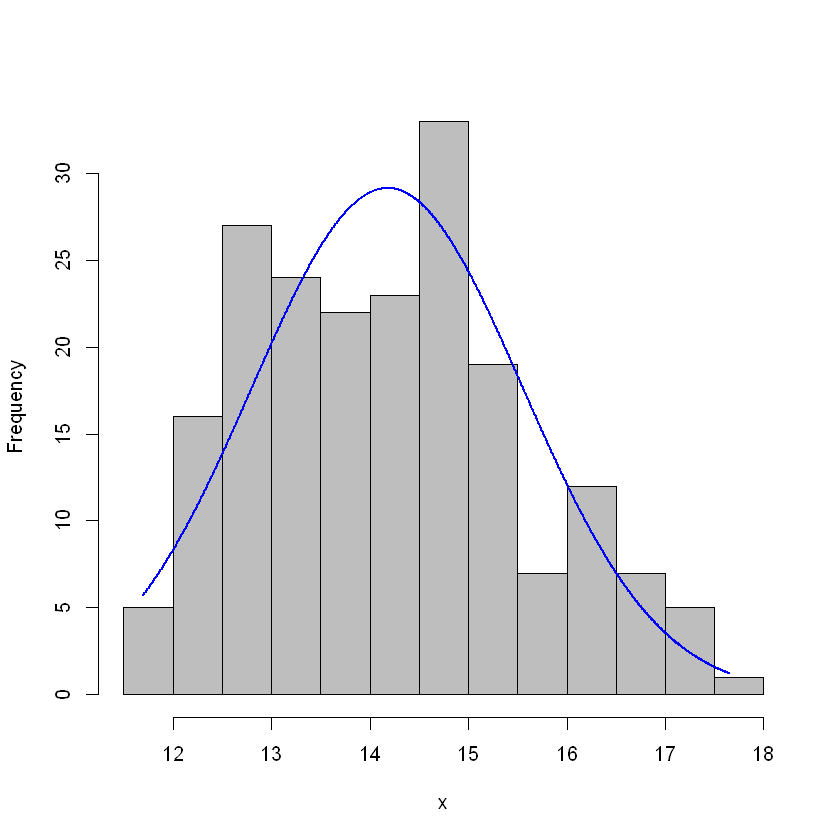

In [14]:
plotNormalHistogram(honey$totalprodLOG)

#### very nice

In [16]:
leveneTest(totalprodLOG ~ year, data=honey)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,4,0.03178299,0.9980452
,196,NA,NA


#### Analysis

In [17]:
RManova <- aov(totalprodLOG ~ year+Error(state), honey)
summary(RManova)


Error: state
          Df Sum Sq Mean Sq F value Pr(>F)
year       1    2.6   2.571   0.272  0.605
Residuals 39  368.6   9.452               

Error: Within
           Df Sum Sq Mean Sq F value  Pr(>F)   
year        4  0.677 0.16913   4.007 0.00402 **
Residuals 156  6.584 0.04221                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [18]:
RMANOVA <- aov(log(totalprod) ~ year, honey)

In [19]:
summary(RMANOVA)

             Df Sum Sq Mean Sq F value Pr(>F)
year          4    0.4   0.112   0.058  0.994
Residuals   196  378.0   1.929               

In [ ]:
#p value is .99 > .05, so significant change. 